# Basics of the Adjacency Matrix
This summarizes my initial set of basic notes surrounding the adjacency matrix representation of a graph

There are multiple ways of representing graph-structured data. One of the most common ways is using the adjacency matrix, where connections between nodes are represented in a row-column format.

For example:
$$
A = \begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 0\\
\end{bmatrix}
$$
 
$A$ is a matrix with three nodes, with connections between nodes $(1,0)$ and $(1,2)$ 


In [5]:
# function to plot networks
import numpy as np 
import networkx as nx

from bokeh.io import output_file, show, output_notebook
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

def plot_graph(A, name):

    output_notebook()
    G=nx.from_numpy_matrix(A)

    plot = Plot(width=400, height=400,
                x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
    plot.title.text = name

    plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

    graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

    graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
    graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
    graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

    graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
    graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
    graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

    graph_renderer.selection_policy = NodesAndLinkedEdges()
    graph_renderer.inspection_policy = EdgesAndLinkedNodes()

    plot.renderers.append(graph_renderer)

    show(plot)

## Isomorphism
Graphs which exist in the same form, but which are labelled differently

### Simple Example

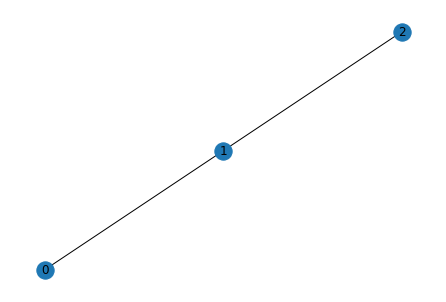

In [7]:
A = np.matrix('''
    0 1 0;
    1 0 1;
    0 1 0
''')
G = nx.from_numpy_matrix(A)
nx.draw(G, with_labels=True)

Using a permutation matrix $P$, we can derive another graph isomorphic to the original. Row-number specifies the original node to operate on, column number specifies what number this node is renumbered to 

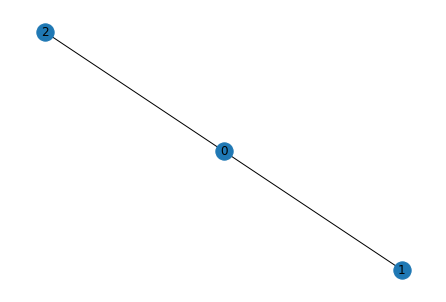

In [8]:
P = np.matrix('''
    0 1 0;
    1 0 0;
    0 0 1
''')

# matrix multiplication with numpy
A_perm = P @ A @ P.T
nx.draw(nx.from_numpy_matrix(A_perm), with_labels=True)

### Complex Example

In [9]:
# create adjacency matrix (undirected)
A = np.array([
    [0, 1, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0],
]) 

In [10]:
# permutation matrix (exactly 1 value equal to 1 in each row and column)
P = np.array([ 
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

In [11]:
A_perm = np.matmul(np.matmul(P, A), P.T)
A_perm

array([[0, 1, 1, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0]])

In [12]:
G = nx.from_numpy_matrix(A)
G_perm = nx.from_numpy_matrix(A_perm)

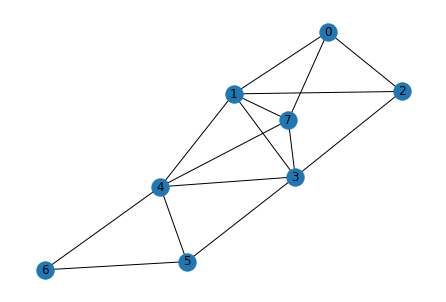

In [14]:
nx.draw(G, with_labels=True)

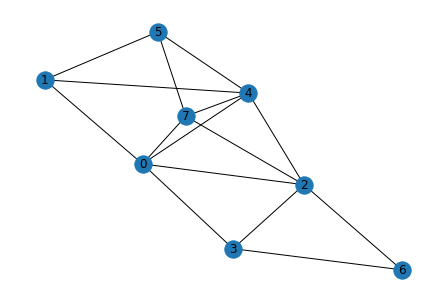

In [15]:
nx.draw(G_perm, with_labels=True)

In [16]:
nx.is_isomorphic(G, G_perm)

True

# Degree Matrix

Diagonal matrix containing node-degree of the $i^{th}$ node in every $(i,i)$ position

In [17]:
# degree matrix 
nx.degree(G)

D = np.zeros((8, 8), dtype=np.uint8)
for idx, v in enumerate(A):
    D[idx, idx] = np.sum(A[idx, :])

D

array([[3, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 4]], dtype=uint8)

In [18]:
nx.degree(G)

DegreeView({0: 3, 1: 5, 2: 3, 3: 5, 4: 5, 5: 3, 6: 2, 7: 4})

# Laplacian Matrix  
Basic definition:
$$
\mathcal{L} = D-A
$$  

Interesting properties:
- Geometric multiplicity of the 0 eigenvalue is the number of connected components
- Is symmetric (mirrored across leading diagonal)
- Is positive semi-definite (has an inverse)

In [19]:
# unnormalized laplacian 
D - A

array([[ 3, -1, -1,  0,  0,  0,  0, -1],
       [-1,  5, -1, -1, -1,  0,  0, -1],
       [-1, -1,  3, -1,  0,  0,  0,  0],
       [ 0, -1, -1,  5, -1, -1,  0, -1],
       [ 0, -1,  0, -1,  5, -1, -1, -1],
       [ 0,  0,  0, -1, -1,  3, -1,  0],
       [ 0,  0,  0,  0, -1, -1,  2,  0],
       [-1, -1,  0, -1, -1,  0,  0,  4]])

## Weight Matrix
Like and adjacency matrix, but weight of connections are important

In [22]:
 G = nx.from_numpy_matrix(W := np.matrix('''
    0 0.54 0.14 0 0 0 0 0.47;
    0.54 0 0.63 0.35 0.30 0 0 0.31;
    0.14 0.63 0 0.31 0 0 0 0;
    0 0.35 0.31 0 0.54 0.43 0 0.13;
    0 0.30 0 0.54 0 0.54 0.62 0.54;
    0 0 0 0.43 0.54 0 0.37 0;
    0 0 0 0 0.62 0.37 0 0;
    0.47 0.31 0 0.13 0.54 0 0 0
'''))

plot_graph(W, 'G')

Loading BokehJS ...

In [35]:
# degree matrix
D = np.zeros((8, 8))
for i in range(8):
    D[i, i] = np.sum(W[i])

D

array([[1.15, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 2.13, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.08, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.76, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 2.54, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.34, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.45]])

In [36]:
# Laplacian
L = D - W
L

matrix([[ 1.15, -0.54, -0.14,  0.  ,  0.  ,  0.  ,  0.  , -0.47],
        [-0.54,  2.13, -0.63, -0.35, -0.3 ,  0.  ,  0.  , -0.31],
        [-0.14, -0.63,  1.08, -0.31,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  , -0.35, -0.31,  1.76, -0.54, -0.43,  0.  , -0.13],
        [ 0.  , -0.3 ,  0.  , -0.54,  2.54, -0.54, -0.62, -0.54],
        [ 0.  ,  0.  ,  0.  , -0.43, -0.54,  1.34, -0.37,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  , -0.62, -0.37,  0.99,  0.  ],
        [-0.47, -0.31,  0.  , -0.13, -0.54,  0.  ,  0.  ,  1.45]])

Normalized Laplacian 

$$
\textbf{L}_N = \textbf{D}^{-1/2}(\textbf{D}-\textbf{W})\textbf{D}^{-1/2}
$$

All negative powers considered inverse, so: $ D^{-1/2} $ is `sqrtm(inv(D))`

In [44]:
# normalized Laplacian 
from scipy.linalg import sqrtm
from numpy.linalg import matrix_power, inv

np.around(sqrtm(inv(D)) @ (D-W) @ sqrtm(inv(D)), 2)

array([[ 1.  , -0.35, -0.13,  0.  ,  0.  ,  0.  ,  0.  , -0.36],
       [-0.35,  1.  , -0.42, -0.18, -0.13,  0.  ,  0.  , -0.18],
       [-0.13, -0.42,  1.  , -0.22,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.18, -0.22,  1.  , -0.26, -0.28,  0.  , -0.08],
       [ 0.  , -0.13,  0.  , -0.26,  1.  , -0.29, -0.39, -0.28],
       [ 0.  ,  0.  ,  0.  , -0.28, -0.29,  1.  , -0.32,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.39, -0.32,  1.  ,  0.  ],
       [-0.36, -0.18,  0.  , -0.08, -0.28,  0.  ,  0.  ,  1.  ]])

### Walks
The number of walks between n amd  of length K is equal to the element (m, n) of matrix A^K, walks can include vertices multiple times

Number of walks between m and n of length not higher than K is equal to (m, n) of B_k, where:

$$
\textbf{B}_K = \textbf{A} + \textbf{A}^2+...+\textbf{A}^K
$$

### Paths
Walk where each vertex may be included only once, path length equal to number of edges  

---

Distance between two vertices is shortest path length between them  

### Diameter
Diameter is equal to largest distance between all pairs of vertices in graph  

### Connected Graphs
If graph not conncted, it is two or more disjoint graphs with $\textbf{A}$, A for graph with M disjoint components, note zeros are vectors, block is formed only if vertex numbering follows graph components:

$$
\begin{bmatrix}
\textbf{A}_1 &  0 & ... & 0\\
0 & \textbf{A} & ... & 0\\
... & ... & ... & ...\\
0 & 0 & ... & \textbf{A}_M
\end{bmatrix}
$$
and Laplacian
$$
\begin{bmatrix}
\textbf{L}_1 &  0 & ... & 0\\
0 & \textbf{L} & ... & 0\\
... & ... & ... & ...\\
0 & 0 & ... & \textbf{L}_M
\end{bmatrix}
$$

$$
\textbf{A} = \textbf{A}_1 \bigotimes\textbf{A}_2
$$

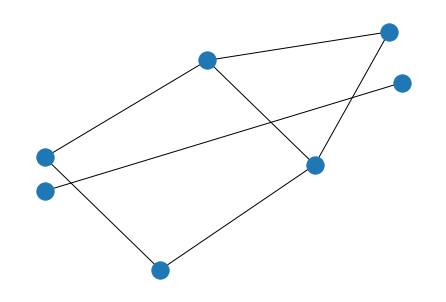

In [49]:
# Kronecker
from numpy import kron 
A_1 = np.matrix('''
    0 1 0 1 0;
    0 0 1 1 0;
    0 1 0 0 1;
    1 1 0 0 1;
    0 0 1 1 0
''')

nx.draw(G_1 := nx.from_numpy_matrix(A_1))

A_2 = np.matrix('''
    0 1;
    1 0
''')
nx.draw(G_2 := nx.from_numpy_matrix(A_2))


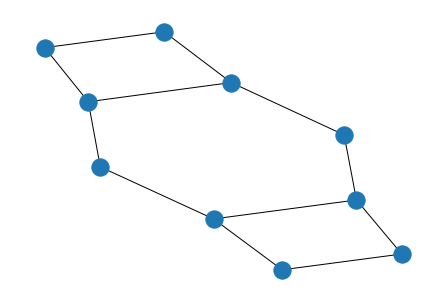

In [50]:
kron_prod = kron(A_1, A_2)
nx.draw(G_kron := nx.from_numpy_matrix(kron_prod))